<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>


В этой домашке вы напишите свой класс логистической регрессии для многоклассовой классификации, а также логистическую регрессию с регуляризацией.

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
np.random.seed(42)

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [3]:
def f(x):
  """
  :param x: np.array(np.float) размерности 2
  :return: np.float
  """
  return np.sum(np.sin(x)**2, axis=0)

Обратите внимание, что $x$ - numpy-array размерности 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [4]:
def grad_f(x): 
  """
  Градиент функциии f, определенной выше.
  :param x: np.array(np.float) размерности 2
  :return: np.array(np.float) размерности 2
  """
  return 2 * np.sin(x) * np.cos(x)

In [5]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
    
    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []
    
    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        # обновте curr_x
        curr_x = curr_x - lr * grad_f(curr_x)

    return np.vstack(history)

In [6]:
steps = grad_descent_2d(f, grad_f, lr=1, num_iter=20)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точку минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [7]:


x = np.array([
    [
        [1, 54, 3],
        [1, 2, 300],
        [10, 2, 3],
    ],
    [
        [0, 1, 4],
        [1, -1, 2],
        [0, 23, 21],
    ]
])

print(x.sum(axis=0))

[[  1  55   7]
 [  2   1 302]
 [ 10  25  24]]


In [8]:
plt.scatter(X, Y)

NameError: name 'X' is not defined

NameError: name 'cm' is not defined

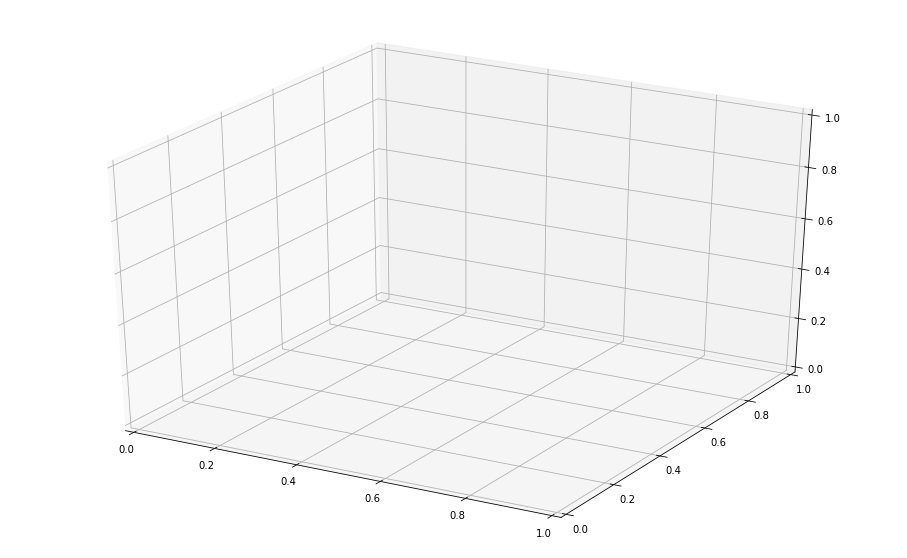

In [9]:
def f_sphere(x):
    return (np.power(x, 2)).sum(axis=0)


X, Y = np.meshgrid(np.arange(-4100, 4100), np.arange(-4100, 4100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f_sphere([X, Y]), cmap=cm.coolwarm, zorder=2);

In [ ]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, f([X, Y]), cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

Посмотрим на график значений функции от шага

In [ ]:
x = np.array([[1, 100], [2, 0]])
x.sum(axis=0)

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend();

Когда вы используете градиентный спуск всегда нужно проверять, сошелся ли он. К сожалению для большинства моделей не получится построить 3D график, поэтому обязательно нужно смотреть на то, как менялся лосс на каждом шаге градиентного спуска.

# 2. Генератор батчей

Обычно генерация батчей отличается от той, которую мы использовали в семинаре. Мы выбирали *batch_size* случайных строчек на каждом шаге, но у такого подхода есть минусы. Основной заключается в том, что некоторые строчки из обучающего датасета могут попадаться значительно реже, чем другие. 

Чтобы это исправить обучение делят на эпохи. Мы хотим, чтобы в течение одной эпохи модель обучилась на каждом примере один раз. Для этого нужно перемешать строчки в датасете и каждый раз брать очередные *batch_size* строчек. 

Может так получится, что размер датасета не делится на *batch_size*, тогда последний батч будет состоять из нескольких последних строк и его размер будет меньше, чем *batch_size*. Такой батч иногда выкидывают и просто не используют. Именно так вам нужно поступить в этом задании.

Напишите генератор батчей, который будет принимать на вход признаки, ответы и размер батча. Генератор должен возвращать tuple из ($X_{batch}$, $y_{batch}$). Если размер датасета не делится на batch_size, то последний маленький батч возвращать не нужно. 

Подробнее про Python генераторы можно прочитать здесь:

[Документация](https://wiki.python.org/moin/Generators)

[Описание на русском](https://pythoner.name/list-generator)

Чтобы не перемешивать сам датасет воспользуйтесь np.random.permutation(len(X))


In [21]:
np.sign([1, 2, 3])

array([1, 1, 1])

In [10]:
from random import choice


def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    full_batch_quantity = len(perm) // batch_size
   
    perm = list(perm)
    for i in range(full_batch_quantity):
        
        batch_inds = []
        batch_inds.extend(perm[(i*batch_size):((i+1)*batch_size)])
    
        assert len(batch_inds) == batch_size
        print(batch_inds)
        yield (X[batch_inds], y[batch_inds])
    


Проверим, что наш генератор батчей перемешивает датасет и каждый элемент встречается один раз:

In [11]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

assert (X_fake != X_reconstructed).all()
assert (y_fake != y_reconstructed).all()

assert (np.sort(X_reconstructed, axis=0) == X_fake).all

[83, 53, 70, 45, 44, 39, 22, 80, 10, 0]
[18, 30, 73, 33, 90, 4, 76, 77, 12, 31]
[55, 88, 26, 42, 69, 15, 40, 96, 9, 72]
[11, 47, 85, 28, 93, 5, 66, 65, 35, 16]
[49, 34, 7, 95, 27, 19, 81, 25, 62, 13]
[24, 3, 17, 38, 8, 78, 6, 64, 36, 89]
[56, 99, 54, 43, 50, 67, 46, 68, 61, 97]
[79, 41, 58, 48, 98, 57, 75, 32, 94, 59]
[63, 84, 37, 29, 1, 52, 21, 2, 23, 87]
[91, 74, 86, 82, 20, 60, 71, 14, 92, 51]


Попробуем теперь *batch_size* не делящий размер датасета.

In [12]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

assert num_batches == len(X_fake) // 7

[83, 53, 70, 45, 44, 39, 22]
[80, 10, 0, 18, 30, 73, 33]
[90, 4, 76, 77, 12, 31, 55]
[88, 26, 42, 69, 15, 40, 96]
[9, 72, 11, 47, 85, 28, 93]
[5, 66, 65, 35, 16, 49, 34]
[7, 95, 27, 19, 81, 25, 62]
[13, 24, 3, 17, 38, 8, 78]
[6, 64, 36, 89, 56, 99, 54]
[43, 50, 67, 46, 68, 61, 97]
[79, 41, 58, 48, 98, 57, 75]
[32, 94, 59, 63, 84, 37, 29]
[1, 52, 21, 2, 23, 87, 91]
[74, 86, 82, 20, 60, 71, 14]


# 3. Логистическая регрессия с $l_1$ и $l_2$ регуляризацией. (elastic net)

Ваша задача -- написать класс логистической регрессии с обеими регуляризациями и оптимизацией с помощью SGD, используя генератор батчей, который вы написали выше.


In [22]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyElasticLogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.
        losses = []
        #### YOUR CODE (train loop here, use self.get_grad)####
        for _ in range(epochs):
            batch_generator = generate_batches
            for X_batch, y_batch in batch_generator(X_train, y, batch_size=batch_size):
                y_pred = sigmoid(logit(X_batch, self.w))
                grad = self.get_grad(X_batch, y_batch, y_pred)
                
                self.w -= grad * lr
                losses.append(self.__loss(y_batch, y_pred))
        
        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        НЕ НУЖНО РЕГУЛЯРИЗИРОВАТЬ BIAS.
        """
        w0 = self.w.copy()
        w0[0] = 0
        
        grad = X_batch.T @ (predictions - y_batch) / len(y_batch)
        grad += self.l1_coef * np.sign(w0)
        grad += 2 * self.l2_coef * w0
        
        return grad
        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

Протестируем на искусственных данных:


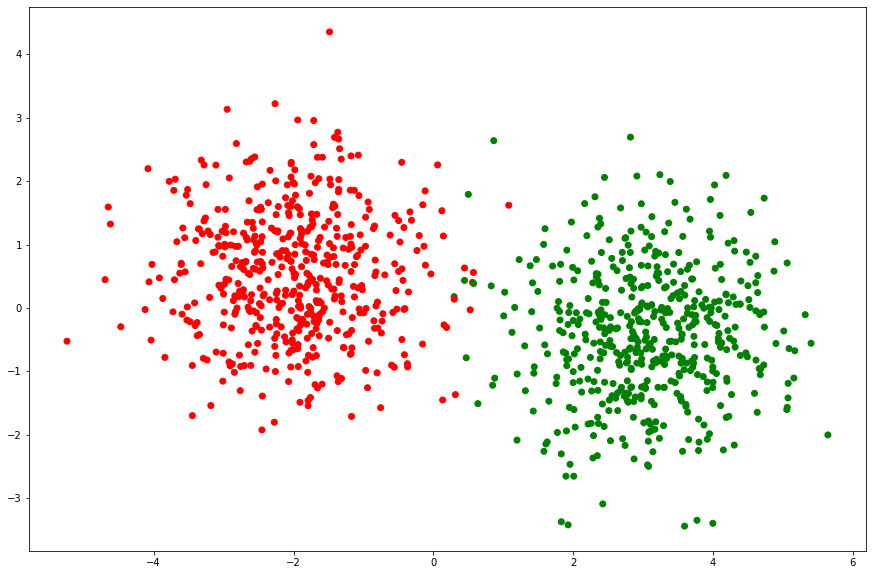

In [29]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [30]:
clf = MyElasticLogisticRegression(0.1, 0.1)
clf.fit(X, y, epochs=1000)
w = clf.get_weights()

[521, 737, 740, 660, 411, 678, 626, 513, 859, 136, 811, 76, 636, 973, 938, 899, 280, 883, 761, 319, 549, 174, 371, 527, 210, 235, 101, 986, 902, 947, 346, 139, 621, 499, 370, 198, 687, 584, 901, 59, 328, 96, 312, 974, 299, 277, 924, 601, 439, 837, 570, 879, 261, 578, 23, 30, 617, 10, 221, 820, 296, 54, 542, 209, 604, 692, 662, 866, 70, 543, 107, 493, 590, 741, 292, 289, 652, 39, 589, 307, 679, 66, 275, 67, 318, 548, 998, 714, 753, 327, 382, 451, 522, 218, 787, 436, 764, 88, 63, 826]
[716, 351, 936, 256, 635, 644, 554, 959, 168, 917, 528, 823, 985, 816, 86, 432, 184, 978, 534, 294, 892, 425, 713, 260, 237, 559, 583, 445, 867, 800, 599, 849, 265, 995, 529, 55, 120, 215, 25, 72, 44, 247, 721, 281, 893, 914, 810, 244, 822, 321, 643, 158, 977, 429, 941, 462, 309, 697, 60, 884, 595, 767, 649, 650, 865, 668, 298, 689, 314, 310, 361, 479, 110, 989, 486, 363, 254, 259, 802, 677, 494, 670, 377, 526, 845, 137, 355, 365, 942, 749, 948, 829, 656, 199, 213, 408, 332, 208, 613, 78]
[29, 535, 695, 557

[17, 127, 322, 255, 657, 964, 190, 115, 616, 606, 180, 301, 759, 712, 723, 685, 979, 517, 984, 45, 909, 157, 851, 171, 16, 511, 48, 971, 940, 515, 952, 480, 283, 718, 877, 225, 26, 954, 437, 951, 364, 229, 37, 965, 374, 469, 967, 850, 704, 841, 194, 854, 864, 503, 969, 830, 579, 968, 162, 908, 152, 801, 993, 755, 111, 226, 688, 103, 421, 419, 750, 586, 780, 672, 119, 53, 151, 403, 945, 207, 658, 843, 762, 8, 807, 36, 452, 651, 253, 303, 746, 571, 623, 732, 891, 262, 610, 297, 414, 150]
[788, 640, 889, 550, 886, 488, 147, 146, 720, 931, 739, 659, 348, 463, 325, 186, 123, 853, 608, 143, 958, 197, 609, 279, 293, 400, 122, 183, 202, 438, 246, 415, 932, 765, 906, 835, 887, 129, 637, 402, 784, 770, 735, 913, 219, 641, 915, 752, 806, 919, 624, 874, 760, 386, 972, 509, 267, 819, 441, 496, 112, 691, 232, 869, 607, 671, 373, 981, 842, 233, 785, 676, 317, 648, 410, 898, 709, 358, 258, 744, 627, 632, 282, 376, 384, 224, 953, 814, 472, 347, 505, 639, 987, 928, 905, 619, 855, 803, 645, 846]
[556, 95

[541, 440, 482, 422, 778, 949, 334, 576, 934, 567, 594, 530, 581, 707, 448, 453, 228, 352, 728, 212, 79, 148, 302, 628, 777, 506, 342, 485, 711, 133, 703, 311, 722, 629, 0, 316, 706, 547, 872, 532, 477, 404, 172, 125, 394, 420, 552, 903, 90, 939, 181, 274, 895, 69, 291, 131, 300, 424, 326, 144, 423, 580, 135, 450, 164, 28, 773, 193, 388, 852, 169, 705, 140, 173, 6, 745, 478, 73, 910, 813, 238, 145, 792, 234, 220, 923, 500, 132, 990, 774, 185, 41, 696, 108, 588, 56, 405, 442, 757, 997]
[24, 467, 539, 531, 618, 694, 926, 338, 51, 507, 516, 920, 781, 264, 817, 710, 682, 832, 518, 447, 18, 715, 483, 568, 433, 367, 83, 61, 638, 272, 285, 360, 354, 456, 278, 12, 182, 368, 881, 615, 223, 572, 970, 653, 545, 582, 633, 176, 665, 673, 585, 873, 393, 163, 248, 634, 885, 669, 375, 412, 74, 113, 598, 961, 390, 104, 114, 417, 525, 457, 409, 92, 930, 89, 336, 988, 921, 933, 605, 593, 611, 94, 11, 396, 533, 43, 42, 329, 167, 497, 876, 597, 756, 100, 426, 178, 444, 416, 870, 882]
[680, 177, 395, 911, 7

[29, 535, 695, 557, 836, 596, 165, 918, 495, 824, 65, 141, 925, 827, 655, 331, 664, 249, 907, 708, 305, 734, 975, 49, 896, 2, 544, 350, 904, 536, 344, 994, 481, 575, 33, 31, 231, 963, 192, 333, 3, 204, 514, 799, 306, 109, 430, 77, 84, 286, 82, 991, 789, 894, 398, 323, 519, 916, 922, 5, 731, 465, 97, 266, 357, 868, 798, 380, 631, 381, 490, 118, 900, 250, 523, 9, 196, 603, 81, 783, 587, 797, 239, 290, 211, 717, 359, 449, 227, 950, 946, 796, 501, 464, 362, 468, 935, 428, 7, 155]
[541, 440, 482, 422, 778, 949, 334, 576, 934, 567, 594, 530, 581, 707, 448, 453, 228, 352, 728, 212, 79, 148, 302, 628, 777, 506, 342, 485, 711, 133, 703, 311, 722, 629, 0, 316, 706, 547, 872, 532, 477, 404, 172, 125, 394, 420, 552, 903, 90, 939, 181, 274, 895, 69, 291, 131, 300, 424, 326, 144, 423, 580, 135, 450, 164, 28, 773, 193, 388, 852, 169, 705, 140, 173, 6, 745, 478, 73, 910, 813, 238, 145, 792, 234, 220, 923, 500, 132, 990, 774, 185, 41, 696, 108, 588, 56, 405, 442, 757, 997]
[24, 467, 539, 531, 618, 694,

[716, 351, 936, 256, 635, 644, 554, 959, 168, 917, 528, 823, 985, 816, 86, 432, 184, 978, 534, 294, 892, 425, 713, 260, 237, 559, 583, 445, 867, 800, 599, 849, 265, 995, 529, 55, 120, 215, 25, 72, 44, 247, 721, 281, 893, 914, 810, 244, 822, 321, 643, 158, 977, 429, 941, 462, 309, 697, 60, 884, 595, 767, 649, 650, 865, 668, 298, 689, 314, 310, 361, 479, 110, 989, 486, 363, 254, 259, 802, 677, 494, 670, 377, 526, 845, 137, 355, 365, 942, 749, 948, 829, 656, 199, 213, 408, 332, 208, 613, 78]
[29, 535, 695, 557, 836, 596, 165, 918, 495, 824, 65, 141, 925, 827, 655, 331, 664, 249, 907, 708, 305, 734, 975, 49, 896, 2, 544, 350, 904, 536, 344, 994, 481, 575, 33, 31, 231, 963, 192, 333, 3, 204, 514, 799, 306, 109, 430, 77, 84, 286, 82, 991, 789, 894, 398, 323, 519, 916, 922, 5, 731, 465, 97, 266, 357, 868, 798, 380, 631, 381, 490, 118, 900, 250, 523, 9, 196, 603, 81, 783, 587, 797, 239, 290, 211, 717, 359, 449, 227, 950, 946, 796, 501, 464, 362, 468, 935, 428, 7, 155]
[541, 440, 482, 422, 778,

[29, 535, 695, 557, 836, 596, 165, 918, 495, 824, 65, 141, 925, 827, 655, 331, 664, 249, 907, 708, 305, 734, 975, 49, 896, 2, 544, 350, 904, 536, 344, 994, 481, 575, 33, 31, 231, 963, 192, 333, 3, 204, 514, 799, 306, 109, 430, 77, 84, 286, 82, 991, 789, 894, 398, 323, 519, 916, 922, 5, 731, 465, 97, 266, 357, 868, 798, 380, 631, 381, 490, 118, 900, 250, 523, 9, 196, 603, 81, 783, 587, 797, 239, 290, 211, 717, 359, 449, 227, 950, 946, 796, 501, 464, 362, 468, 935, 428, 7, 155]
[541, 440, 482, 422, 778, 949, 334, 576, 934, 567, 594, 530, 581, 707, 448, 453, 228, 352, 728, 212, 79, 148, 302, 628, 777, 506, 342, 485, 711, 133, 703, 311, 722, 629, 0, 316, 706, 547, 872, 532, 477, 404, 172, 125, 394, 420, 552, 903, 90, 939, 181, 274, 895, 69, 291, 131, 300, 424, 326, 144, 423, 580, 135, 450, 164, 28, 773, 193, 388, 852, 169, 705, 140, 173, 6, 745, 478, 73, 910, 813, 238, 145, 792, 234, 220, 923, 500, 132, 990, 774, 185, 41, 696, 108, 588, 56, 405, 442, 757, 997]
[24, 467, 539, 531, 618, 694,

[716, 351, 936, 256, 635, 644, 554, 959, 168, 917, 528, 823, 985, 816, 86, 432, 184, 978, 534, 294, 892, 425, 713, 260, 237, 559, 583, 445, 867, 800, 599, 849, 265, 995, 529, 55, 120, 215, 25, 72, 44, 247, 721, 281, 893, 914, 810, 244, 822, 321, 643, 158, 977, 429, 941, 462, 309, 697, 60, 884, 595, 767, 649, 650, 865, 668, 298, 689, 314, 310, 361, 479, 110, 989, 486, 363, 254, 259, 802, 677, 494, 670, 377, 526, 845, 137, 355, 365, 942, 749, 948, 829, 656, 199, 213, 408, 332, 208, 613, 78]
[29, 535, 695, 557, 836, 596, 165, 918, 495, 824, 65, 141, 925, 827, 655, 331, 664, 249, 907, 708, 305, 734, 975, 49, 896, 2, 544, 350, 904, 536, 344, 994, 481, 575, 33, 31, 231, 963, 192, 333, 3, 204, 514, 799, 306, 109, 430, 77, 84, 286, 82, 991, 789, 894, 398, 323, 519, 916, 922, 5, 731, 465, 97, 266, 357, 868, 798, 380, 631, 381, 490, 118, 900, 250, 523, 9, 196, 603, 81, 783, 587, 797, 239, 290, 211, 717, 359, 449, 227, 950, 946, 796, 501, 464, 362, 468, 935, 428, 7, 155]
[541, 440, 482, 422, 778,

[556, 957, 577, 795, 85, 242, 698, 159, 524, 35, 540, 170, 654, 890, 857, 847, 944, 733, 95, 563, 240, 742, 574, 690, 460, 553, 888, 206, 392, 794, 397, 766, 848, 217, 4, 768, 642, 929, 612, 738, 546, 725, 683, 98, 804, 727, 573, 406, 502, 47, 32, 779, 839, 200, 134, 27, 880, 230, 489, 772, 378, 288, 418, 674, 391, 592, 498, 138, 62, 471, 647, 128, 976, 520, 838, 962, 64, 812, 14, 156, 40, 492, 379, 187, 763, 216, 791, 52, 878, 337, 748, 719, 724, 295, 701, 251, 726, 461, 455, 996]
[815, 862, 269, 201, 161, 555, 729, 401, 702, 476, 821, 771, 105, 565, 389, 1, 937, 982, 561, 80, 205, 34, 775, 508, 427, 454, 366, 91, 339, 897, 564, 345, 776, 241, 13, 315, 600, 387, 273, 166, 840, 992, 646, 818, 484, 980, 504, 831, 243, 566, 875, 562, 686, 189, 782, 699, 475, 681, 510, 58, 474, 560, 856, 747, 252, 21, 313, 459, 160, 276, 955, 191, 385, 805, 413, 491, 343, 769, 308, 661, 130, 663, 871, 99, 372, 87, 458, 330, 214, 466, 121, 614, 20, 700, 71, 106, 270, 860, 435, 102]
[521, 737, 740, 660, 411

[680, 177, 395, 911, 793, 960, 684, 383, 956, 751, 257, 538, 335, 15, 324, 758, 222, 179, 983, 22, 356, 666, 861, 340, 431, 551, 833, 203, 630, 93, 558, 68, 622, 284, 844, 434, 153, 75, 730, 446, 188, 271, 236, 487, 117, 943, 512, 825, 591, 126, 116, 473, 693, 57, 863, 912, 369, 268, 46, 349, 195, 999, 834, 736, 263, 443, 675, 304, 341, 966, 149, 124, 786, 50, 353, 927, 142, 470, 399, 625, 320, 19, 809, 790, 808, 407, 537, 620, 38, 175, 245, 828, 667, 754, 858, 154, 287, 602, 569, 743]
[17, 127, 322, 255, 657, 964, 190, 115, 616, 606, 180, 301, 759, 712, 723, 685, 979, 517, 984, 45, 909, 157, 851, 171, 16, 511, 48, 971, 940, 515, 952, 480, 283, 718, 877, 225, 26, 954, 437, 951, 364, 229, 37, 965, 374, 469, 967, 850, 704, 841, 194, 854, 864, 503, 969, 830, 579, 968, 162, 908, 152, 801, 993, 755, 111, 226, 688, 103, 421, 419, 750, 586, 780, 672, 119, 53, 151, 403, 945, 207, 658, 843, 762, 8, 807, 36, 452, 651, 253, 303, 746, 571, 623, 732, 891, 262, 610, 297, 414, 150]
[788, 640, 889, 55

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



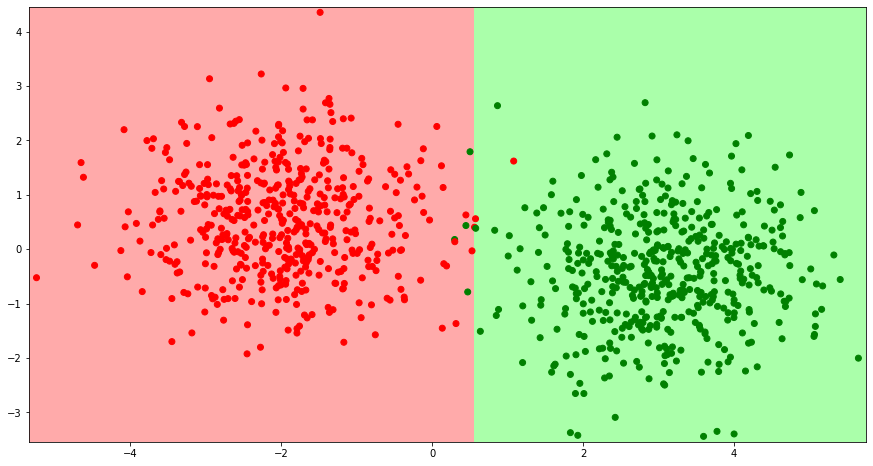

In [31]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

Теперь протестируем на датасете MNIST. Это очень простой класический датасет, на котором часто тестируются модели. С помощью нейронных сетей люди научились получать на нем качество 99.84%. 

Датасет состоит из черно-белых картинок с цифрами. ![mnist-3.0.1.png](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Так как мы сделали классификатор для двух классов, то мы выберем из всех картинок только картинки 0 и 1, првратим их из двумерной матрицы в вектор и обучим нашу модель.

In [32]:
data = pd.read_csv('./train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Данные выглядят как таблица, первая колонка которой это лейбел -- цифра, которая изображена на картинке, а следующие 784 колонки это значения от 0 до 255, описывающие все пиксели картинки 28х28. То есть нам не придется делать reshape и превращать матрицу в вектор, так как это уже сделано.

In [33]:
X = data.iloc[:, 1:]
y = data.iloc[:, 1]

# Выберем только картинки, где изображен 0 и 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

Для оценки модели мы используем кросс валидацию.